# Name- Suryashmi Chakraborty

# Task No.5- Sales Prediction Using Python

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\SURYASHMI\\Downloads\\Advertising.csv") #READING THE DATASET

In [3]:
df.head() #RETURNS FIRST 5 ENTRIES

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail() 

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

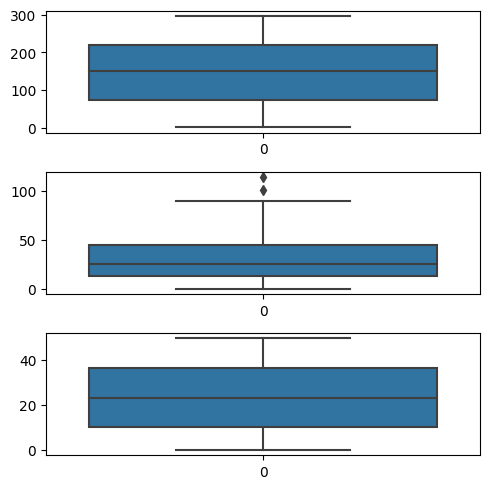

In [14]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [15]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [16]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) +(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [17]:
data = df.copy()

In [18]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

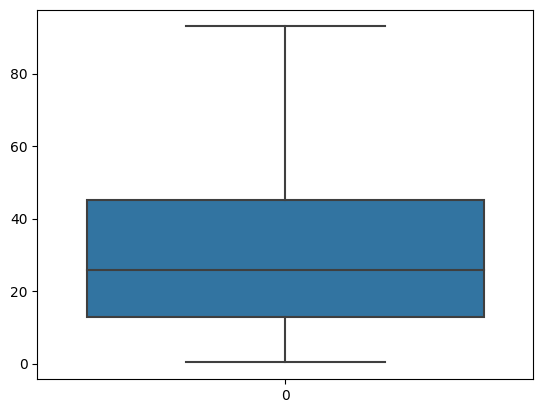

In [19]:
sns.boxplot(data['Newspaper'])

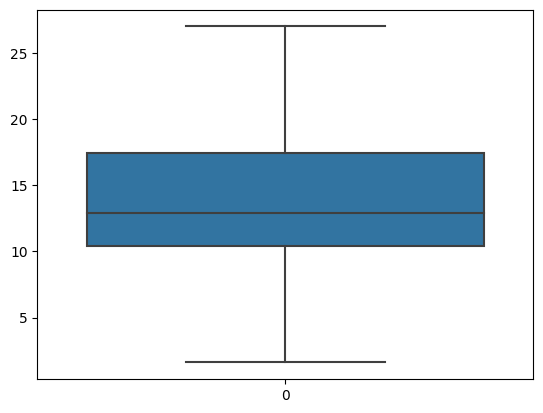

In [20]:
sns.boxplot(data['Sales']);

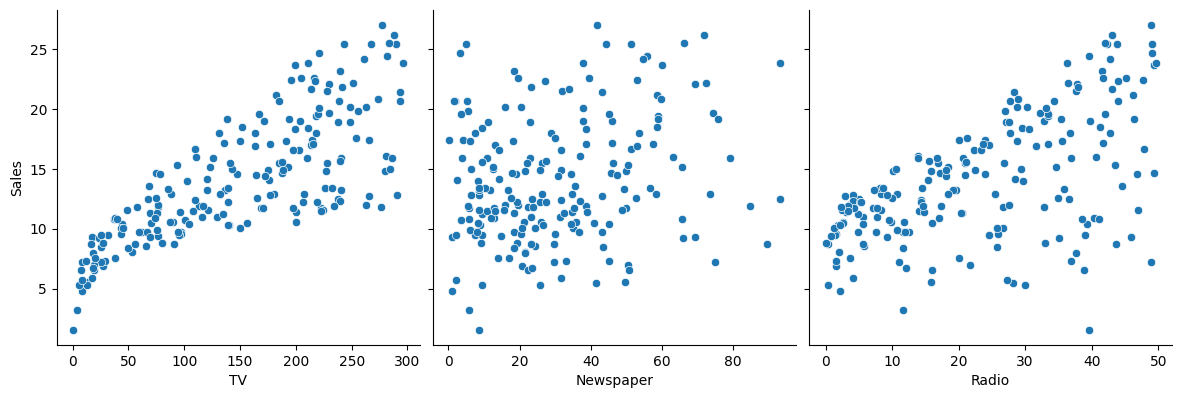

In [23]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [24]:
imp_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']>-0.5)].index)

In [25]:
print(imp_features)

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


In [26]:
x = data['TV']
y = data['Sales']

In [27]:
X = x.values.reshape(-1,1)

In [28]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [30]:
print(X.shape,y.shape)

(200, 1) (200,)


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [32]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [42]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor

In [43]:
knn = KNeighborsRegressor().fit(X_train,y_train)
knn

KNeighborsRegressor()

In [44]:
knn_train_pred = knn.predict(X_train)

In [46]:
knn_test_pred = knn.predict(X_test)

In [47]:
print(knn_train_pred, knn_test_pred)

[ 5.62 14.26 19.32 16.04 17.2  17.52 12.02 17.12 13.24  7.74 11.78  7.4
  4.88 19.4  18.9  15.78  7.18 14.8  19.32 16.64 19.98  6.32 10.46  8.2
 12.66  9.7  14.38 11.78 17.04 19.76 15.2  10.46 12.12 15.78 14.38 10.74
 10.92 16.94 20.44 18.32  8.12 15.74 19.98 13.72 17.02 17.72 17.62 12.12
 18.32 10.8  15.28 11.26 19.16 19.88 15.16 14.18 11.24 16.   14.5  19.4
  7.18  5.62 13.42  6.32 17.72  9.62 12.02 14.5  21.34 14.04 11.78 20.7
 19.98  7.74  8.12 21.4  19.98  7.4   7.18 13.72 14.8  13.72  5.62 16.06
 17.06 12.78 11.74  7.18 14.8  11.08 10.12 12.54  4.88 13.76 20.22  8.12
 17.02 15.06 19.12 13.58 13.76 16.   13.5  15.48 20.44 14.26 17.16 21.4
 15.06 12.54 14.5  15.64 19.98 12.92 11.74  9.7  17.16 12.54 14.18 11.78
  8.2  19.08 14.38 11.78 14.92 19.4  17.04 17.02 11.84 13.3  17.   20.7
 20.7  15.78] [14.5  19.98 18.08 16.   15.3  20.68 10.74 12.54 17.46  9.62 11.84 12.78
 12.06 14.38 14.04 15.64 11.74 17.52 14.6  22.1  17.2  16.22 10.38  8.12
 13.72 15.78 11.78 19.4  13.72 21.78 14.5  

In [48]:
Results = pd.DataFrame(columns=["Model","Train R2", "Test R2", "Test RMSE", "Variance"])

In [53]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance


In [55]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [56]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [60]:
print(svr_train_pred,svr_test_pred)

[ 7.55987645 15.00945289 17.15723196 17.48392715 17.22040853 15.64311145
 11.73173882 15.67788141 12.71917007  8.29349059 10.85982496  7.8612128
  7.43378095 16.63817203 17.12799619 17.65663576  7.9356351  16.31252258
 17.15361604 15.33893077 17.47273249  7.72966379  9.4694427   8.53131014
 11.95257049  8.88359159 13.54180126 10.88693895 16.79442623 17.07900179
 17.64862536  9.56666007 12.32846094 17.65372821 13.23451358 10.53103943
 10.24813037 15.2329815  17.69107089 16.95913284  8.20730272 17.58329003
 17.50025381 13.09443097 16.07471654 17.67019203 16.66456349 12.2923064
 16.9632772   9.98858168 14.61454875 11.8948017  17.01221899 17.09427103
 16.53310954 14.67769422 11.31896765 17.44797911 14.22828315 16.72493107
  7.93160767  7.59547641 12.13455135  7.72636578 17.67992443  9.25172425
 11.82370218 14.42187675 17.06452525 12.79966635 10.80025394 17.20931702
 17.57904912  8.32779093  8.15154953 16.96394808 17.55550931  7.89982576
  7.9682845  12.03655056 16.26479017 13.03102849  7.5

In [62]:
import statsmodels.api as sm

In [63]:
X_train_constant = sm.add_constant(X_train)

In [64]:
model = sm.OLS(y_train, X_train_constant).fit()

In [66]:
model.params

const    7.084058
x1       0.047000
dtype: float64

In [67]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 01 May 2023   Prob (F-statistic):           7.31e-27
Time:                        11:25:16   Log-Likelihood:                -355.66
No. Observations:                 134   AIC:                             715.3
Df Residuals:                     132   BIC:                             721.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0841      0.601     11.796      0.0

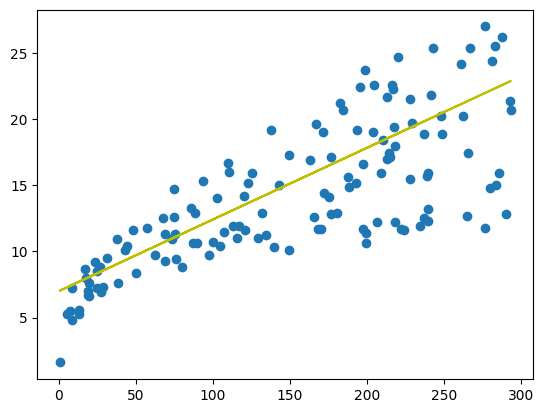

In [71]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [72]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)

In [73]:
res

56    -1.927161
41     1.696873
181   -5.153643
124    1.829353
128    7.261757
         ...   
89     4.455299
122   -6.012145
102   -5.453566
178   -8.289065
146   -5.168851
Name: Sales, Length: 134, dtype: float64

In [78]:
y_train_pred

array([ 7.4271611 , 15.40312662, 17.35364264, 17.87064689, 17.43824334,
       15.91073079, 11.66659593, 15.93893102, 13.16590824,  8.34366863,
       10.59498712,  7.87836481,  7.11695855, 20.85047137, 17.31604233,
       18.36885098,  7.96766554, 16.47473542, 17.3489426 , 15.66632878,
       19.62846133,  7.70446338,  9.35417693,  8.56457044, 12.00029867,
        8.87007295, 14.12471612, 10.62318735, 16.93533921, 17.25494183,
       18.33125067,  9.43407759, 12.59250353, 18.35475087, 13.80041345,
       10.27068446, 10.01218234, 15.58172809, 18.77775434, 17.11394067,
        8.25906793, 18.10564882, 19.56736083, 13.64061214, 16.26793372,
       18.4440516 , 16.80373813, 12.53610307, 17.11864071,  9.78658048,
       15.08352399, 11.91099793, 17.17504118, 17.27374199, 16.67683708,
       15.13522442, 11.11199137, 17.80014631, 14.75922133, 20.74707052,
        7.9629655 ,  7.49296164, 12.28700102,  7.69976334, 18.51455218,
        9.17557546, 11.80289705, 14.92372268, 20.30996693, 13.27

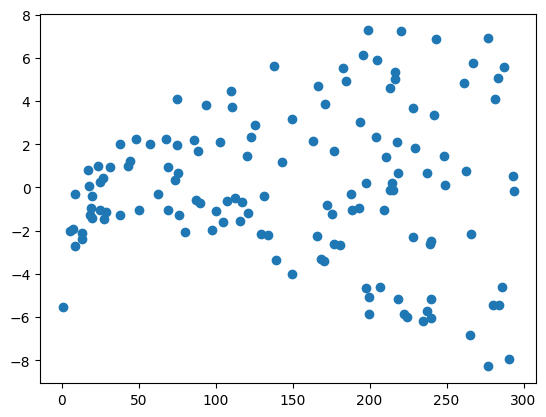

In [79]:
plt.scatter(X_train,res)
plt.show()

In [81]:
X_test_constant=sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [82]:
y_pred

array([14.76862141, 19.44045978, 16.99173967, 17.69674546, 14.44431874,
       19.94806395, 10.29888469, 11.33289318, 16.06583206,  9.18497554,
       11.51149465, 12.73350469, 11.60549542, 14.00721515, 13.2458089 ,
       17.53694415, 10.40228554, 15.91543083, 13.72521284, 18.87645515,
       17.44764341, 17.99284789,  9.59857894,  8.28726817, 13.48551087,
       18.3594509 , 10.67488778, 20.70007013, 13.67821245, 19.01275627,
       14.81562179, 16.60163646, 21.01497272, 17.89884712, 19.08795689,
        7.89246492, 14.20461677, 15.31382589,  8.81837253,  7.45066129,
       13.63121206,  7.27675987, 10.67018774,  8.94057353, 10.1907838 ,
       12.24470067, 10.22838411,  9.72547998,  7.47886153, 11.65249581,
       11.58199523, 16.80843816,  7.89246492, 10.75948847, 18.27955025,
       15.77442967, 13.62651203, 17.762546  , 10.63258743, 17.41474314,
       13.43851048,  7.6339628 ,  9.88528129, 16.44183515,  9.10507488,
       20.27706666])

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [85]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.801757183848379

In [86]:
r2 = r2_score(y_test, y_pred)

In [87]:
r2

0.677331278738798

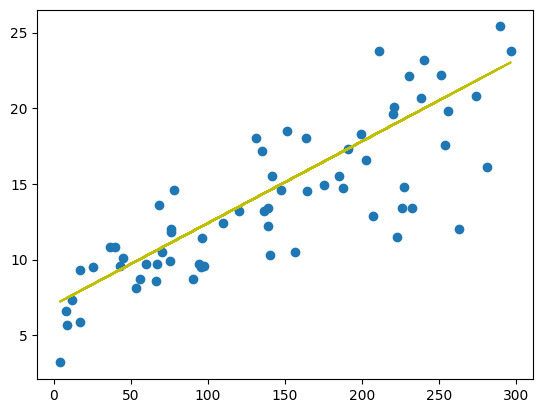

In [88]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')